### Basic Fundamentals:

##### What is Classification Problem?
A classification problem entails making predictions to determine whether an item belongs to a specific category or a different one.

Common examples of classification problems include:

* __`Email spam detection:`__ Classifying emails as either spam or non-spam (ham).
* __`Image classification:`__ Identifying objects or scenes in images and assigning them to specific categories.
* __`Sentiment analysis:`__ Determining the sentiment expressed in a piece of text (e.g., positive, negative, or neutral).
* __`Medical diagnosis:`__ Predicting the presence or absence of a specific disease based on patient data and symptoms.
* __`Credit risk assessment:`__ Classifying credit applicants into low-risk and high-risk categories for loan approval.
    

##### Classification Architechture

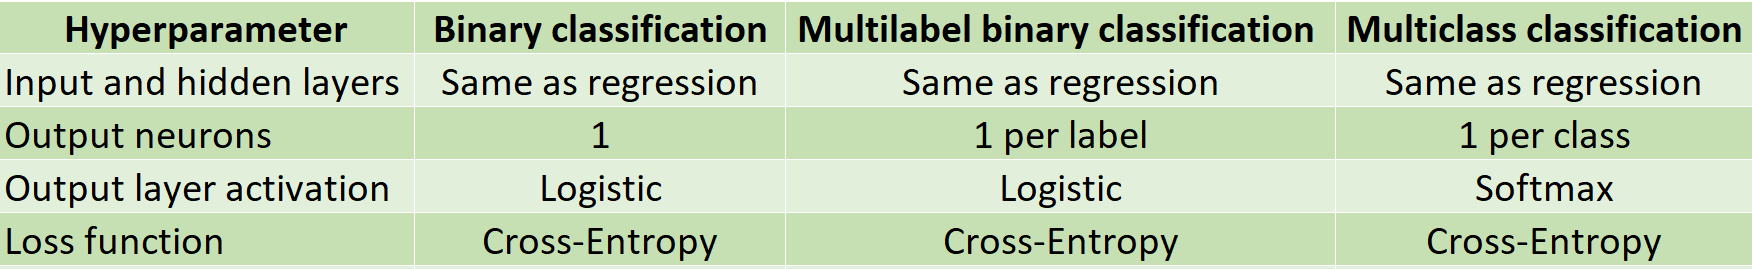

##### Important Concepts & Visuals:

* TensorFLow Playground: https://playground.tensorflow.org/

More to follow...



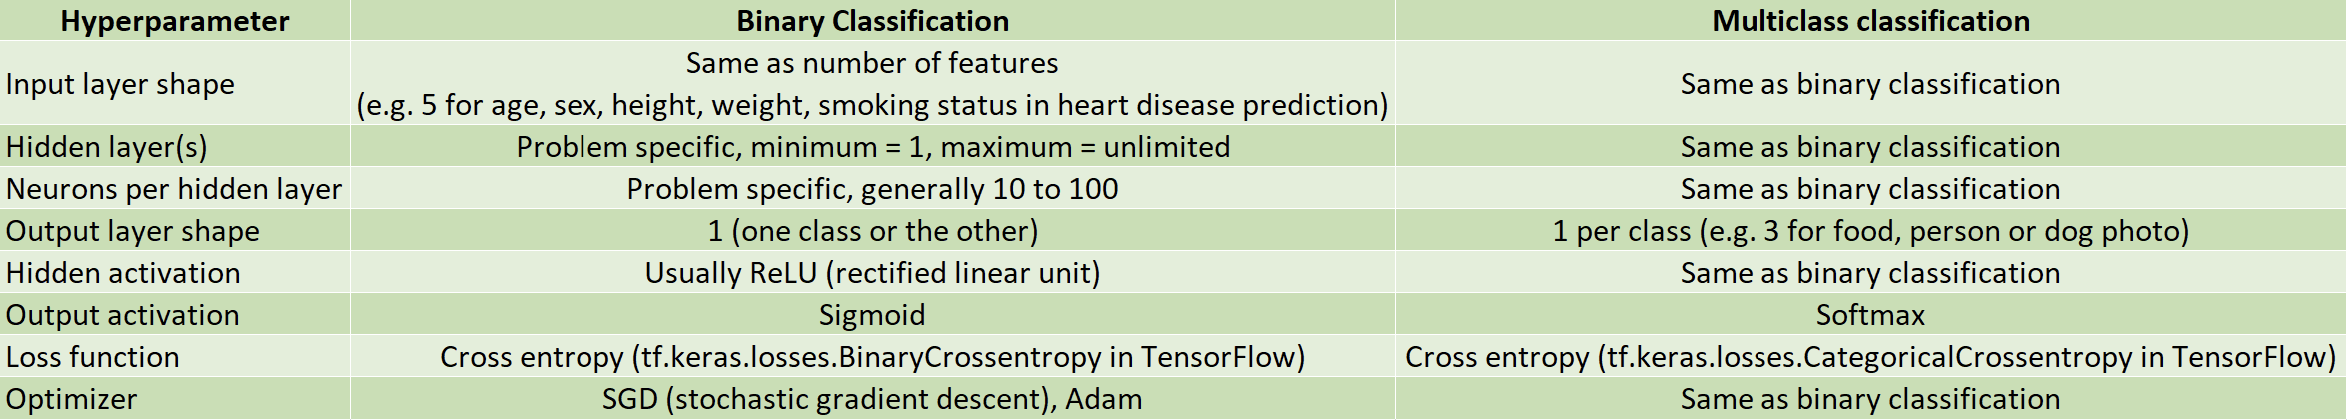

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


## Visualizing Activation Functions

In [4]:
import matplotlib.pyplot as plt

In [3]:
T = tf.cast(tf.range(-15, 15), tf.float32)
T

<tf.Tensor: shape=(30,), dtype=float32, numpy=
array([-15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,
        -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,
         7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.], dtype=float32)>

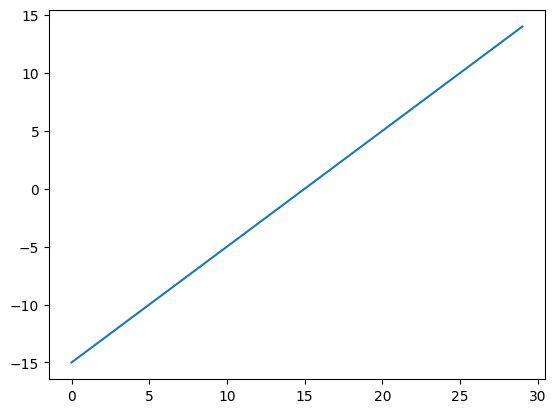

In [5]:
plt.plot(T)

### Sigmoid 

__`tf.keras.activations.sigmoid`__  returns Tensor with the sigmoid activation: `1 / (1 + exp(-x))`.

Read Here: https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid?version=nightly

In [6]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(T)

<tf.Tensor: shape=(30,), dtype=float32, numpy=
array([3.0590220e-07, 8.3152804e-07, 2.2603244e-06, 6.1441751e-06,
       1.6701422e-05, 4.5397872e-05, 1.2339458e-04, 3.3535014e-04,
       9.1105117e-04, 2.4726233e-03, 6.6928510e-03, 1.7986210e-02,
       4.7425874e-02, 1.1920292e-01, 2.6894143e-01, 5.0000000e-01,
       7.3105860e-01, 8.8079703e-01, 9.5257413e-01, 9.8201376e-01,
       9.9330717e-01, 9.9752742e-01, 9.9908900e-01, 9.9966466e-01,
       9.9987662e-01, 9.9995458e-01, 9.9998331e-01, 9.9999380e-01,
       9.9999774e-01, 9.9999917e-01], dtype=float32)>

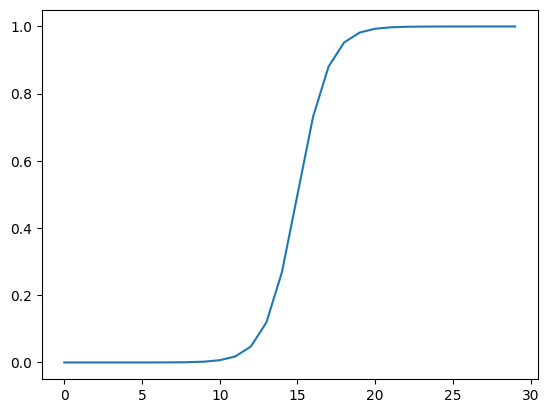

In [7]:
plt.plot(sigmoid(T))

### ReLU

__`tf.keras.activations.relu`__  Returns A Tensor representing the input tensor, transformed by the relu activation function(ReLU turns all negatives to 0 and positive numbers stay the same). 
    Tensor will be of the same shape and dtype of input x.

Read Here: https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=nightly

In [9]:
def relu(x):
    return tf.maximum(0, x)

relu(T)

<tf.Tensor: shape=(30,), dtype=float32, numpy=
array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,
       11., 12., 13., 14.], dtype=float32)>

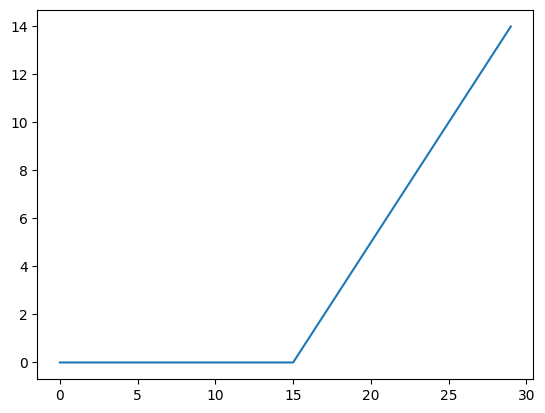

In [10]:
plt.plot(relu(T))

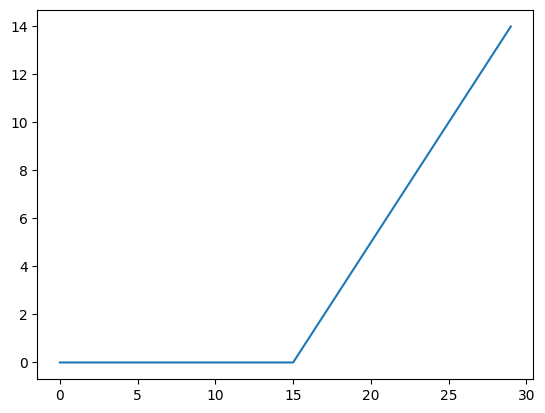

In [8]:
plt.plot(tf.keras.activations.relu(T))

### Multiclass classification

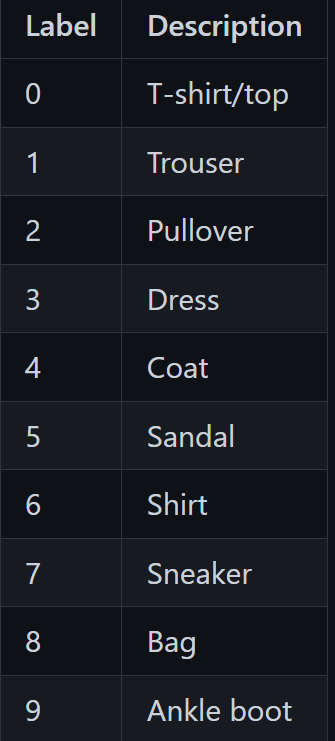

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [14]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [18]:
train_data[0].shape

(28, 28)

In [19]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [20]:
train_labels[0]

9

In [21]:
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
              # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
              tf.keras.layers.Flatten(input_shape=(28, 28)), 
              tf.keras.layers.Dense(4, activation="relu"),
              tf.keras.layers.Dense(4, activation="relu"),
              tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
              ])

# Compile the model
# different loss function for multiclass classifcation
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [22]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


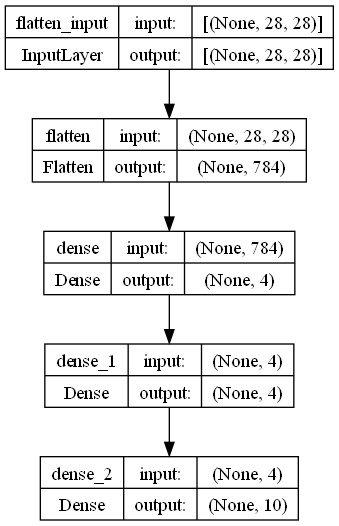

In [34]:
# See the inputs and outputs of each layer
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes=True)

In [25]:
tf.random.set_seed(43)

# Create the model
model_2 = tf.keras.Sequential([
              tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)), 
              tf.keras.layers.Dense(4, activation="relu"),
              tf.keras.layers.Dense(4, activation="relu"),
              tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
              ])

# Compile the model
# different loss function for multiclass classifcation
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [26]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 10)                50        
                                                                 
Total params: 101,066
Trainable params: 101,066
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Fit the model
model_1_hist = model_1.fit(train_data, train_labels, epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 896us/step - loss: 2.3112 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 2s 830us/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 829us/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 2s 855us/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 2s 849us/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 2s 863us/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 855us/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 -

In [28]:
# Fit the model
model_12_hist = model_2.fit(train_data, train_labels, epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10


ValueError: in user code:

    File "C:\Users\afaqu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\afaqu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\afaqu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\afaqu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\afaqu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\afaqu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 784), found shape=(32, 28, 28)


In [ ]:
x_train.reshape(-1, 28 * 28)

In [32]:
train_data[0].reshape(-1).shape

(784,)